# Hotel booking

- Travel agents offer advice on destinations, plan trip itineraries, and make travel arrangements for clients. Travel agents sell transportation, lodging, and admission to entertainment activities to individuals and groups planning trips. So the travel company wants to see the cancellation situation difference between resort and city hotel.
- Read only ‘`is_canceled`’ and ‘`hotels`’ columns. Do the task with the help of visualization.

# ⚕️ Data Information ℹ️

| Column Name                     | Description                                                     |
|-------------------------------:|--------------------------------------------------------------|
| `hotel`                         | Indicates the type of accommodation (e.g., "Resort Hotel" or "City Hotel"). |
| `is_canceled`                   | Shows whether the reservation was canceled (0: Not Canceled, 1: Canceled). |
| `leadtime`                      | Represents the number of days between the booking date and the arrival date. |
| `arrivalyear`                   | Indicates the year of the customer's arrival.                  |
| `arrivalmonth`                  | Indicates the month of the customer's arrival.                 |
| `staysweekendnights`            | Specifies the weekend nights' duration of stay.               |
| `staysweeknights`               | Specifies the weekdays' duration of stay.                      |
| `adults`, `children`, `babies`  | Specifies the number of adults, children, and babies in the stay. |
| `meal`                          | Indicates the meal plan chosen by the customer during booking. |
| `country`                       | Represents the customer's country.                            |
| `market_segment`                | Specifies the market segment (e.g., "Online TA" or "Offline TA/TO"). |
| `distribution_channel`          | Indicates how the reservation was distributed (e.g., "Direct" or "Corporate"). |
| `is_repeated_guest`             | Indicates whether the customer is a repeated guest (0: No, 1: Yes). |
| `previous_cancellations`        | Specifies the number of previous reservation cancellations.  |
| `booking_changes`               | Specifies the number of changes made to the reservation.      |
| `deposit_type`                  | Specifies the payment type for the reservation.               |
| `days_in_waiting_list`          | Shows the number of days spent on the waiting list.           |
| `customer_type`                 | Specifies the customer type (e.g., "Transient" or "Contract").|
| `adr`                           | Represents the average daily rate.                            |
| `required_car_parking_spaces`   | Specifies the number of required parking spaces.              |
| `total_of_special_requests`     | Specifies the total number of special requests.               |



# Overview 👓🔭🔬


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("hotelbookingsinfo.csv")

In [3]:
# General Information
def check_data(data,head=5):
    print("##############HEAD###############")
    print(data.head(5))
    print("##############TAIL###############")
    print(data.tail(head))
    print("##############SHAPE###############")
    print(data.shape)
    print("##############INFO###############")
    print(data.info())
    print("##############COLUMNS###############")
    print(data.columns)
    print("##############INDEX##############")
    print(data.index)
    print("##############DESCRIBE########")
    print(data.describe().T)
    print(" #############NaN############# ")
    print(data.isnull().values.any())
    print(data.isnull().sum())

In [4]:
check_data(data)

##############HEAD###############
          hotel  is_canceled  ...  reservation_status  reservation_status_date
0  Resort Hotel            0  ...           Check-Out               2015-07-01
1  Resort Hotel            0  ...           Check-Out               2015-07-01
2  Resort Hotel            0  ...           Check-Out               2015-07-02
3  Resort Hotel            0  ...           Check-Out               2015-07-02
4  Resort Hotel            0  ...           Check-Out               2015-07-03

[5 rows x 32 columns]
##############TAIL###############
             hotel  is_canceled  ...  reservation_status  reservation_status_date
119385  City Hotel            0  ...           Check-Out               2017-09-06
119386  City Hotel            0  ...           Check-Out               2017-09-07
119387  City Hotel            0  ...           Check-Out               2017-09-07
119388  City Hotel            0  ...           Check-Out               2017-09-07
119389  City Hotel       

#  🤩🤩🤩🔎Solution and Conclusion🔍🤩🤩🤩

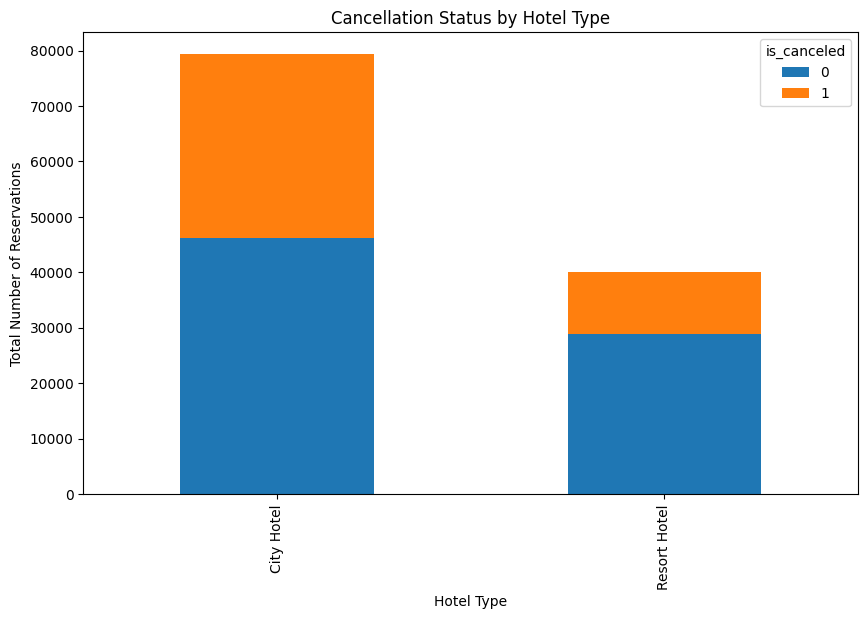

In [5]:
# Select 'is_canceled' and 'hotel' columns
data_selected = data[['is_canceled', 'hotel']]

# Grouping by 'is_canceled' status
grouped_data = data_selected.groupby(['hotel', 'is_canceled']).size().unstack()

# Grouping by 'is_canceled' status
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_ylabel("Total Number of Reservations")
ax.set_xlabel("Hotel Type")
ax.set_title("Cancellation Status by Hotel Type")

plt.show()

# EXTRA ANALYSIS AND EXPLORATION (BONUS)

### 1. Handling Missing Values:

In [7]:
# Filling missing values in 'country' with the most frequent country
data['country'].fillna(data['country'].mode()[0], inplace=True)

# Handling 'agent' and 'company' columns based on analysis goals
# For example, filling missing values with 0
data['agent'].fillna(0, inplace=True)
data['company'].fillna(0, inplace=True)

### 2. Outlier Analysis:

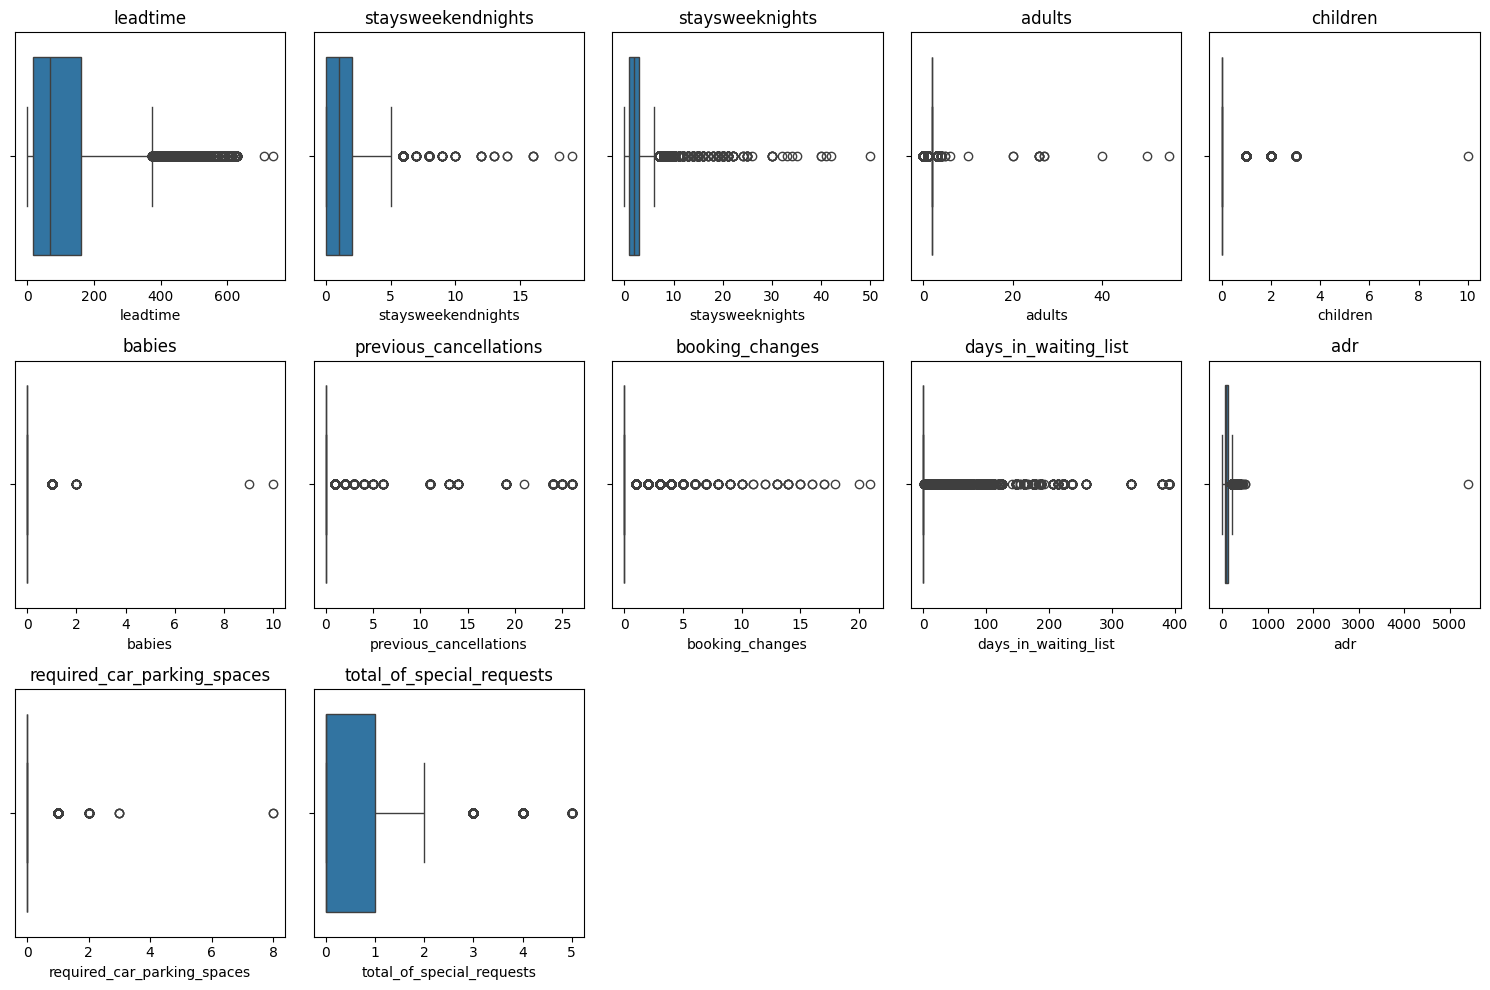

In [36]:
# Outlier analysis for numerical columns
numerical_columns = ['leadtime', 'staysweekendnights', 'staysweeknights', 'adults', 'children', 
                     'babies', 'previous_cancellations', 'booking_changes', 'days_in_waiting_list', 
                     'adr', 'required_car_parking_spaces', 'total_of_special_requests']

# Visualizing boxplots for outlier detection in a single figure
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(x=data[column])
    plt.title(f'{column}')

plt.tight_layout()
plt.show()



### 3. Time Series Analysis:

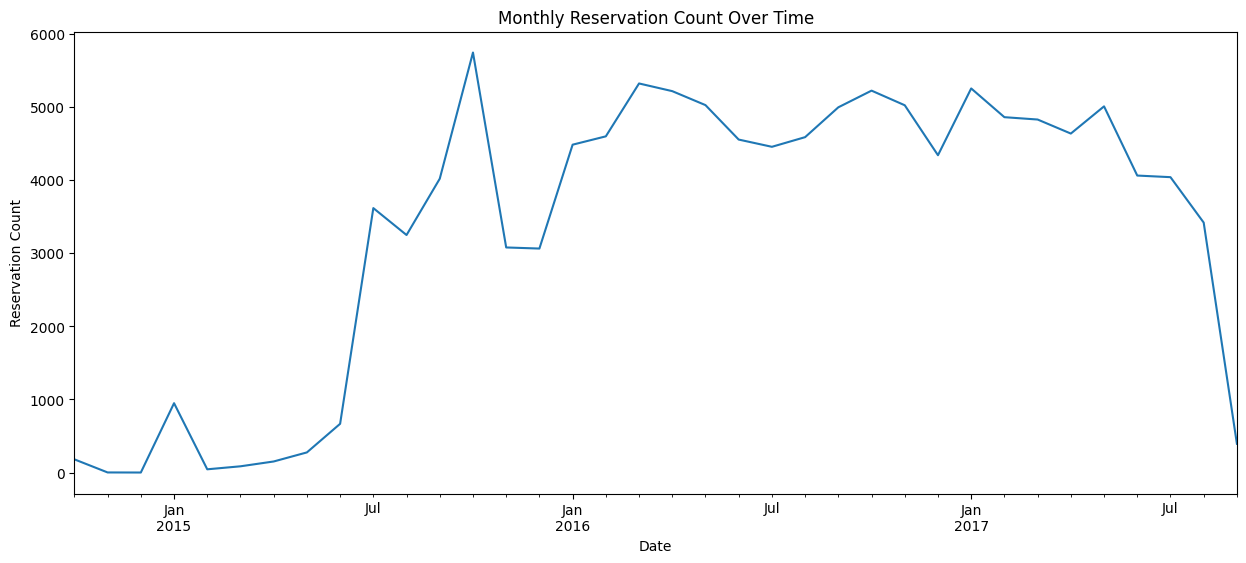

In [11]:
# Convert 'reservation_status_date' to datetime format
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

# Time series analysis - Example: Plotting the count of reservations over time
plt.figure(figsize=(15, 6))
data.resample('M', on='reservation_status_date').size().plot(legend=False)
plt.title('Monthly Reservation Count Over Time')
plt.xlabel('Date')
plt.ylabel('Reservation Count')
plt.show()


### 4. Correlation Analysis:

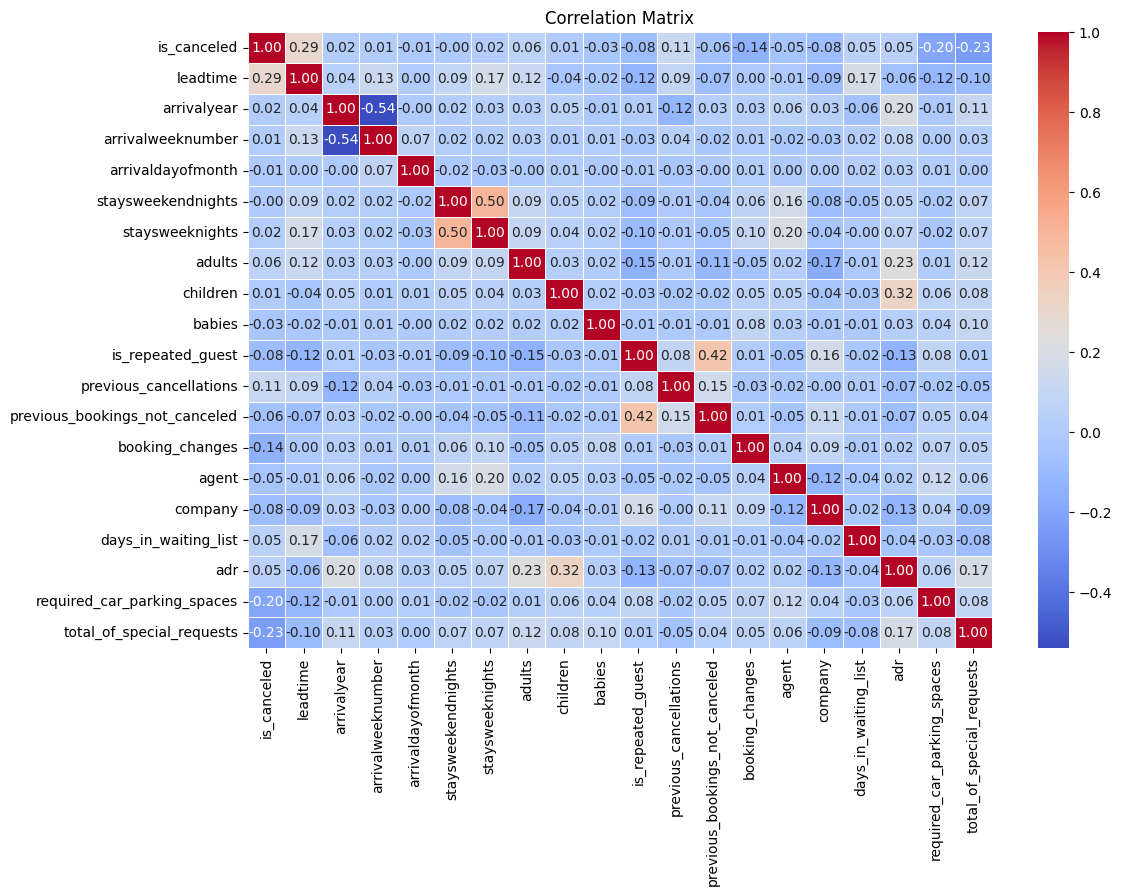

In [12]:
# Correlation matrix
correlation_matrix = data.corr()

# Visualizing the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
